# Reading files with BioIO

In this notebook, we will work with the [`BioIO`](https://bioio-devs.github.io/bioio/OVERVIEW.html) library (formerly [`AICSImageIO`](https://github.com/AllenCellModeling/aicsimageio)) to read microscopy image data. We will use an image in the `.czi` file format.

## Requirements

To install the library, you need to call this command: 

```
pip install bioio
```

Please also install the plugin for .czi file formats:


```
pip install bioio bioio-czi
```

In case you would like to open other specific file formats with `BioIO`, additional dependencies must be installed. See the [documentation](https://github.com/AllenCellModeling/aicsimageio#extra-format-installation) for details. 

In [1]:
import bioio
from bioio import BioImage
from stackview import imshow

## Reading CZI files

First, we will create a `BioImage` object using an image shared by Romina Piscitello-Gómez (MPI-CBG, Dresden).

⚠️ Note: The `bioio-czi` plugin can operate in **two different modes**: `pylibczirw` (default) and `aicspylibczi`. They mainly differ in how they handle tiled images. 

In this example, we will change the default mode by setting `use_aicspylibczi` to True. Otherwise, the provided image cannot be read correctly. If you are working with other (non-tiled) .czi files, you might not need this extra argument. Please check the [documentation](https://github.com/bioio-devs/bioio-czi?tab=readme-ov-file#pylibczirw-vs-aicspylibczi) for more details.

In [2]:
image = BioImage("../../data/PupalWing.czi", use_aicspylibczi=True)
image

<BioImage [plugin: bioio-czi installed at 2025-05-05 17:23:58.259888, Image-is-in-Memory: False]>

This object can already give us basic information such as image size/shape, dimensions and dimension names and order.

In [3]:
image.shape

(1, 1, 80, 520, 692)

In [4]:
image.dims

<Dimensions [T: 1, C: 1, Z: 80, Y: 520, X: 692]>

In [5]:
image.dims.order

'TCZYX'

From this object, we can also retrieve pixels as numpy arrays.

In [6]:
np_image = image.get_image_data("ZYX", T=0)
np_image.shape

(80, 520, 692)

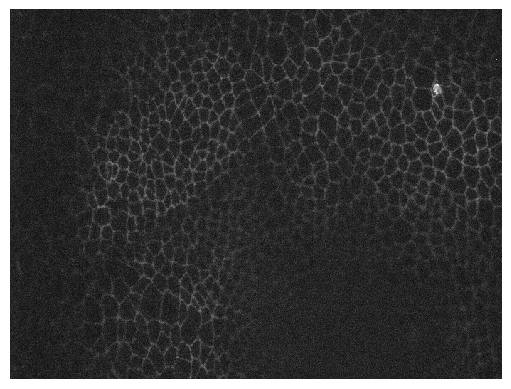

In [7]:
imshow(np_image[35])

## Reading meta data

When working with microscopy image data, it is important to be aware of the meta data, for example the voxel size. In order to do volume measurements in proper physical units, we need to know how large a voxel is in X, Y and Z.

In [8]:
image.physical_pixel_sizes

PhysicalPixelSizes(Z=1.0, Y=0.20476190476190476, X=0.20476190476190476)

You can also define a helper function for reading the voxel size in Z/Y/X format.

In [9]:
def get_voxel_size_from_aics_image(image):
    return (image.physical_pixel_sizes.Z,
            image.physical_pixel_sizes.Y,
            image.physical_pixel_sizes.X)

In [10]:
get_voxel_size_from_aics_image(image)

(1.0, 0.20476190476190476, 0.20476190476190476)

## Exercise
Read a single X-Y plane image from the `image`.